# Fourier 

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
I1 = np.zeros((256,256))
I2 = np.zeros((256,256))
I1[123:133,123:133]=1
I2[23:33,23:33]=2

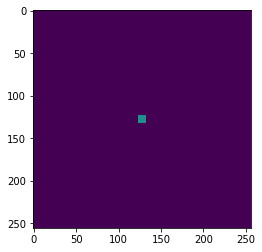

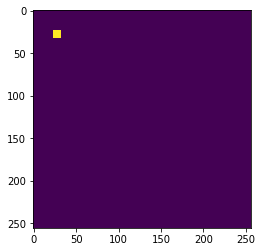

In [39]:
plt.imshow(I1,vmax=2)
plt.show()
plt.imshow(I2,vmax=2)
plt.show()

In [53]:
F1=np.fft.fftshift(np.fft.fft2(I1))
F2=np.fft.fftshift(np.fft.fft2(I2))
F3=np.fft.fftshift(np.fft.fft2(I1+I2))
F2.max()

(200+0j)

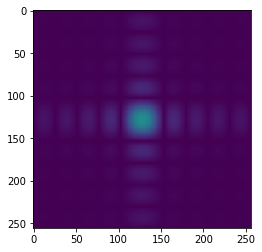

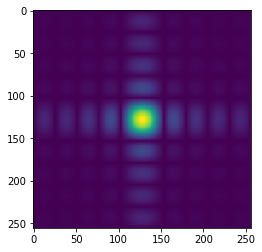

In [54]:
plt.imshow(np.abs(F1),vmax=200)
plt.show()
plt.imshow(np.abs(F2),vmax=200)
plt.show()

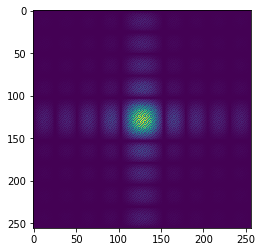

In [55]:
plt.imshow(np.abs(F3))

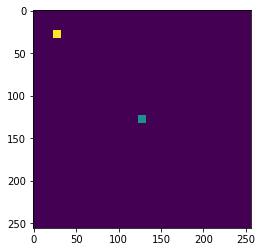

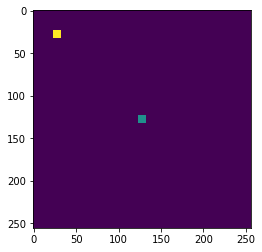

In [57]:
plt.imshow(np.abs(np.fft.ifft2(F3)))
plt.show()
plt.imshow(np.abs(np.fft.ifft2(F1 + F2)))

## Lets go continuous!
Can we replicate this using functions?

* A function for the pixel $$rect(x)=\begin{cases}
                       1 &\text{if} &|x|< 1/2 \\
                        0 & \text{else}
                    \end{cases}$$
                    
* Fourier Transform $$\mathcal{F}_x[rect(x)](u) = \frac{\sin(\pi u)}{\pi u} = sinc(\pi u)$$
* Proof
\begin{align}
\mathcal{F}_x[rect(x)](u) & = \int_{-\infty}^{\infty} rect(x) e^{-i 2\pi u x} dx\\
&= \int_{-1/2}^{1/2} e^{-i 2\pi u x} = \frac{e^{-i 2\pi u x}}{-i 2\pi u} \bigg|^{1/2}_{-1/2} \\
& = \frac{e^{-i \pi u} - e^{i \pi u}}{-i 2\pi u} = \frac{1}{\pi u} \frac{e^{i \pi u} - e^{-i \pi u}}{2i} = \frac{\sin(\pi u)}{\pi u} 
\end{align}
* Shifted rect
\begin{align}
srect_{n,k}(x) &= k*rect(x-n-1/2) & \text{let } x_0 =x-n-1/2\\ 
\mathcal{F}_x[srect_{n,k}(x)](u) &= \int_{-\infty}^{\infty} k*rect(x_0) e^{-i 2\pi u (x_0+n+1/2)} dx_0 \\
&= k e^{-i 2\pi u (n+1/2)} \mathcal{F}_x[rect(x_0)] (u)\\
&= k e^{-i 2\pi nu}e^{-i \pi u} sinc(\pi u) = k g_{n}(u)
\end{align}
* Consider now 
\begin{align}
I_\mathbf{k}(x) &= \sum_{n=0}^{N-1} srect_{n,k_n}(x)\\
\mathcal{F}_x[I_\mathbf{k}(x)](u) & = \sum_{n=0}^{N-1} k_n g_{n}(u) \\
&= \sum_{n=0}^{N-1} k_n e^{-i 2\pi n u }e^{-i \pi u} sinc(\pi u) \\
&= e^{-i \pi u} sinc(\pi u) \sum_{n=0}^{N-1} k_n e^{-i 2\pi n u} 
\end{align}

<Container object of 3 artists>

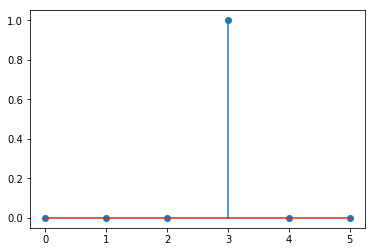

In [60]:
k=[0,0,0,1,0,0]
plt.stem(k)

/Users/mauricio/anaconda3/envs/adassws/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


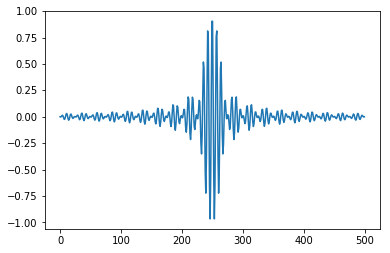

In [78]:
u=np.linspace(-10,10,500)
plt.plot(np.exp(-1j*np.pi*u)*np.sinc(u)*1*np.exp(-1j*2*np.pi*3*u))

## Lets try 2D
* Transform of a 2D rect
\begin{align}
\mathcal{F}_{x,y}[rect(x,y)](u,v) & = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty} rect(x) rect(y)e^{-i 2\pi (u x + v y)} dx dy\\
&=  \left( \int_{-\infty}^{\infty} rect(x) e^{-i 2\pi u x} dx \right) \left( \int_{-\infty}^{\infty} rect(y) e^{-i 2\pi v y} dy \right)\\
&= \mathcal{F}_x[rect(x)](u)\mathcal{F}_y[rect(y)](v) = sinc(\pi u) sinc(\pi y)
\end{align}
* Shifted 2D rect
\begin{align}
srect_{n,m,k}(x,y) &= k*rect(x-n-1/2) rect(y-m-1/2) & \text{let } (x_0,y_0) = (x-n-1/2,y-m-1/2)
\end{align}
\begin{align}
\mathcal{F}_{x,y}[srect_{n,m,k}(x,y)](u,v) &= \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} k\cdot rect(x_0)rect(y_0) e^{-i 2\pi u(x_0+n+1/2)} e^{-i 2\pi v(y_0+m+1/2)} dx_0 dy_0 \\
&= k \left(\int_{-\infty}^{\infty} rect(x_0) e^{-i 2\pi u(x_0+n+1/2)} dx_0\right)\left(\int_{-\infty}^{\infty} rect(y_0) e^{-i 2\pi v(y_0+m+1/2)} dy_0\right)\\
&= k e^{-i 2\pi u (n+1/2)} \mathcal{F}_x[rect(x_0)](u) e^{-i 2\pi v (m+1/2)}\mathcal{F}[rect(y_0)](v)\\
&= k g_n(u) g_m(v) =k \cdot e^{-i 2\pi (nu+mv)} e^{-i \pi(u+v)} sinc(\pi u) sinc(\pi v)
\end{align}
* Consider now 
\begin{align}
I_K(x,y) &= \sum_{n=0}^{N-1} \sum_{m=0}^{M-1} srect_{n,m,k_{n,m}}(x,y)\\
\mathcal{F}_{x,y}[I_K(x,y)](u,v) & = \sum_{n=0}^{N-1} \sum_{m=0}^{M-1} k_{n,m} \cdot e^{-i 2\pi (nu+mv)} e^{-i \pi(u+v)} sinc(\pi u) sinc(\pi v)  \\
&= e^{-i \pi(u+v)} sinc(\pi u) sinc(\pi v) \sum_{n=0}^{N-1} \sum_{m=0}^{M-1} k_{n,m} \cdot e^{-i 2\pi (nu+mv)} = F_K(u,v) \end{align}

## Fourier Transform of a Gaussian
\begin{align}
g(x)&=c\cdot e^{\frac{x^2}{2\sigma^2}}\\
\mathcal{F}_x[g(x)](u) &= c \int_{-\infty}^\infty e^{\frac{-x^2}{2\sigma^2}}e^{-2\pi i ux}dx\\
&= c \sqrt{2\pi} \sigma e^{-2\pi^2u^2 \sigma^2}, 
\end{align}
* Shifted Gaussian
\begin{align}
g_\mu(x) & = c\cdot e^{\frac{(x-\mu)^2}{2\sigma^2}}\\
\mathcal{F}_x[g_\mu(x)](u) &= c \int_{-\infty}^\infty e^{\frac{-x_0^2}{2\sigma^2}}e^{-2\pi i u(x_0+\mu)}dx_0 & \text{with } x_0 = x - \mu\\
& =c\cdot e^{-2\pi i u\mu} \mathcal{F}_x[g(x_0)](u) = c\cdot\sqrt{2\pi} \sigma e^{-2\pi^2u^2 \sigma^2} e^{-2\pi i u\mu}
\end{align}
* Is straight-forward to go 2D with 
\begin{align}
g_{\mu,\nu}(x,y) &= \frac{g_\mu(x)\cdot g_\nu(y)}{c} \\
\mathcal{F}_{x,y}[g_{\mu,nu}(x,y)](u,v) &= c\cdot\sqrt{2\pi} \sigma e^{-2\pi^2u^2 \sigma^2} e^{-2\pi i u\mu}\sqrt{2\pi} \sigma e^{-2\pi^2v^2 \sigma^2} e^{-2\pi i v\nu}\\
&= 2c \pi \sigma^2 e^{-2\pi^2(u^2+v^2) \sigma^2} e^{-2\pi i (u\mu + v\nu)}
\end{align}
* Consider now a gaussian mixture of L components
\begin{align}
G_{\theta}(u,v) &= 2c\pi\sigma^2 e^{-2\pi^2(u^2+v^2) \sigma^2}\sum_{l=0}^L e^{-2\pi i (u\mu_l + v\nu_l)} & \text{with } \theta =\{\mu_1,\ldots,\mu_L,\nu_1,\ldots\nu_L\}
\end{align}

## The Problem
* At last we can define what we want to solve...
$$\theta^*=\min_\theta f(K,\theta) =\min_\theta \int_{-\infty}^{\infty}\int_{-\infty}^{\infty} (F_K(u,v) - G_\theta(u,v))^2 du dv $$
* Problem can be splitted in 3 parts
$$\min_\theta\left\{ \underbrace{\int_{-\infty}^{\infty}\int_{-\infty}^{\infty} F_K(u,v)^2 du dv}_{f_1(K)} - \underbrace{2\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}F_K(u,v)G_\theta(u,v) du dv}_{f_2(K,\theta)} + \underbrace{\int_{-\infty}^{\infty}\int_{-\infty}^{\infty} G_\theta(u,v)^2 du dv}_{f_3(\theta)}\right\}$$

* Part 1 (not really needed for the optimization, but lets do it for completitude)
\begin{align}
f_1(K) &= \int_{-\infty}^{\infty}\int_{-\infty}^{\infty} F_K(u,v)F_K(u,v) du dv\\
&= \int_{-\infty}^{\infty}\int_{-\infty}^{\infty} e^{-i 2\pi(u+v)} sinc(\pi u)^2 sinc(\pi v)^2 \left(\sum_{n=0}^{N-1} \sum_{m=0}^{M-1} k_{n,m} \cdot e^{-i 2\pi (nu+mv)}\right)^2 du dv\\
&=\sum_{n=0}^{N-1} \sum_{m=0}^{M-1}\sum_{n'=0}^{N-1} \sum_{m'=0}^{M-1} k_{n,m} k_{n',m'} \left(\int_{-\infty}^{\infty} sinc(\pi u)^2 e^{-i 2\pi u (1 + n + n')}du \right) \left(\int_{-\infty}^{\infty} sinc(\pi v)^2 e^{-i 2\pi v (1 + m + m')}dv \right) \\
\end{align}
* So let us solve the following equation using the convolution theorem
\begin{align}
h(a) &=\int_{-\infty}^{\infty} sinc(\pi u)^2 e^{-i 2\pi u a} du\\
& = \mathcal{F}_u[sinc(\pi u) sinc(\pi u)](a) = \mathcal{F}_u[sinc(\pi u)](a)*\mathcal{F}_u[sinc(\pi u)](a)\\
& = rect(a)*rect(a) = tri(a)
\end{align}
* Then, the first equation is
\begin{align}
f_1(K)  
&=\sum_{n=0}^{N-1} \sum_{m=0}^{M-1}\sum_{n'=0}^{N-1} \sum_{m'=0}^{M-1} k_{n,m} k_{n',m'} tri(1 + n + n')tri(1 + m + m') = 0
\end{align}
* Lets continue with part 3
\begin{align}
f_3(\theta) &= \int_{-\infty}^{\infty}\int_{-\infty}^{\infty} G_\theta(u,v)G_\theta(u,v) du dv\\
&= \int_{-\infty}^{\infty}\int_{-\infty}^{\infty} 4c^2\pi\sigma^4 e^{-4\pi^2(u^2+v^2) \sigma^2}\sum_{l=0}^L \sum_{l'=0}^L e^{-2\pi i (u\mu_l + v\nu_l)}e^{-2\pi i (u\mu_{l'} + v\nu_{l'})} du dv\\
&= \sum_{l=0}^L \sum_{l'=0}^L 4c^2\pi\sigma^4 \int_{-\infty}^{\infty}\int_{-\infty}^{\infty} e^{-4\pi^2(u^2+v^2)\sigma^2} e^{-2\pi i u(\mu_l +\mu_{l'})} e^{-2\pi i v(\nu_l +\nu_{l'})} du dv\\
&= \sum_{l=0}^L \sum_{l'=0}^L 4c^2\pi\sigma^4 \left( \int_{-\infty}^{\infty} e^{-4\pi^2 u^2 \sigma^2} e^{-2\pi i u(\mu_l + \mu_{l'})} du \right)\left( \int_{-\infty}^{\infty} e^{-4\pi^2 v^2 \sigma^2} e^{-2\pi i v(\nu_l + \nu_{l'})} dv \right)\\
&= \sum_{l=0}^L \sum_{l'=0}^L 4c^2\pi\sigma^4 \frac{1}{2\sigma\sqrt{\pi}}e^{\frac{-(\mu_l + \mu_{l'})^2}{4\sigma^2}}\frac{1}{2\sigma\sqrt{\pi}}e^{\frac{-(\nu_l + \nu_{l'})^2}{4\sigma^2}}\\
&= c^2\sigma^2 \sum_{l=0}^L \sum_{l'=0}^L  e^{\frac{-(\mu_l + \mu_{l'})^2}{4\sigma^2}}e^{\frac{-(\nu_l + \nu_{l'})^2}{4\sigma^2}}
\end{align}
* And at last, part 2:
\begin{align}
f_2(K,\theta) &= \int_{-\infty}^{\infty}\int_{-\infty}^{\infty} F_K(u,v)G_\theta(u,v) du dv\\
&= \sum_{n=0}^{N-1} \sum_{m=0}^{M-1} \sum_{l=0}^L\int_{-\infty}^{\infty}\int_{-\infty}^{\infty} k_{n,m} e^{-i \pi(u+v)} sinc(\pi u) sinc(\pi v)  e^{-i 2\pi (nu+mv)}
 2c\pi\sigma^2 e^{-2\pi^2(u^2+v^2) \sigma^2} e^{-2\pi i (u\mu_l + v\nu_l)}du dv\\
 &= \sum_{n=0}^{N-1} \sum_{m=0}^{M-1} \sum_{l=0}^L k_{n,m} 2c\pi\sigma^2 \left(\int_{-\infty}^{\infty} e^{-i 2\pi u (1/2 + n + \mu_l ) - 2\pi^2 u^2\sigma^2 } sinc(\pi u)
  du \right) \left(\int_{-\infty}^{\infty} e^{-i 2\pi v (1/2 + m + \nu_l ) - 2\pi^2 v^2\sigma^2 } sinc(\pi v)
  dv \right)\\
\end{align}
* To proof:
$$\mathcal{F}_u\left[\frac{e^{-a u^2}}{u}\right](k) = \int_{-\infty}^{\infty} \frac{e^{- a u^2}}{u} e^{-i 2\pi u k} du =  i \sqrt{\frac{\pi}{2}} erf\left(\frac{k}{2 \sqrt{a}}\right)$$
* Where
\begin{align}
& \int_{-\infty}^{\infty} e^{-i 2\pi u (1/2 + n + \mu_l ) - 2\pi^2 u^2\sigma^2 } sinc(\pi u)
  du \\
& =\int_{-\infty}^{\infty} e^{-i 2\pi u (1/2 + n + \mu_l ) - 2\pi^2 u^2\sigma^2 } \frac{(e^{i \pi u} - e^{-i \pi u})}{2i\pi u} 
  du \\
  &= \int_{-\infty}^{\infty}\frac{e^{-i 2\pi u (n + \mu_l )}e^{- 2\pi^2 u^2\sigma^2}}{2i\pi u}du  - \int_{-\infty}^{\infty}\frac{e^{-i 2\pi u (n + \mu_l + 1)}e^{ - 2\pi^2 u^2\sigma^2}}{2i\pi u}du\\
  &= \frac{1}{2i\pi}\mathcal{F}_u\left[\frac{e^{-2\pi^2\sigma^2 u^2}}{u}\right](n + \mu_l) - \frac{1}{2i\pi}\mathcal{F}_u\left[\frac{e^{-2\pi^2\sigma^2 u^2}}{u}\right](n + \mu_l +1)\\
  &= \frac{i \sqrt{\frac{\pi}{2}} erf\left(\frac{n + \mu_l}{2 \sqrt{2\pi^2\sigma^2}}\right)}{2i\pi} - \frac{i \sqrt{\frac{\pi}{2}} erf\left(\frac{n + \mu_l + 1}{2 \sqrt{2\pi^2\sigma^2}}\right)}{2i\pi} \\
  &= \frac{1}{2\sqrt{2\pi}} erf\left(\frac{n + \mu_l}{2 \sqrt{2} \pi\sigma}\right) - \frac{1}{2\sqrt{2\pi}} erf\left(\frac{n + \mu_l + 1}{2 \sqrt{2} \pi\sigma}\right)\\
  &= \frac{-1}{2\sqrt{2\pi}} \left( erf\left(\frac{n + \mu_l + 1}{2 \sqrt{2} \pi\sigma}\right) - erf\left(\frac{n + \mu_l}{2 \sqrt{2} \pi\sigma}\right) \right)\\
  &= \frac{-1}{2\sqrt{2\pi}}\psi_{\sigma}(n,\mu_l)
\end{align}
* Replacing...
\begin{align}
f_2(K,\theta) &= \sum_{n=0}^{N-1} \sum_{m=0}^{M-1} \sum_{l=0}^L k_{n,m} 2c\pi\sigma^2 \frac{1}{4\cdot 2\pi}  \psi_{\sigma}(n,\mu_l) \psi_{\sigma}(m,\nu_l) \\
&=   \frac{c\sigma^2}{4}\sum_{n=0}^{N-1}  \sum_{l=0}^L \psi_{\sigma}(n,\mu_l) \sum_{m=0}^{M-1} k_{n,m} \psi_{\sigma}(m,\nu_l)\\
&=   \frac{c\sigma^2}{4}\sum_{l=0}^L\sum_{n=0}^{N-1} \psi_{\sigma}(n,\mu_l) \sum_{m=0}^{M-1} k_{n,m}  \left( erf\left(\frac{m + \nu_l + 1}{2 \sqrt{2} \pi\sigma}\right) - erf\left(\frac{m + \nu_l}{2 \sqrt{2} \pi\sigma}\right) \right)\\
&=\frac{c\sigma^2}{4} \sum_{l=0}^L \sum_{n=0}^{N-1}   \psi_{\sigma}(n,\mu_l) \sum_{m=0}^{M} (k_{n,m} - k_{n,m-1}) erf\left(\frac{m + \nu_l}{2 \sqrt{2} \pi\sigma}\right) \text{ where } k_{n,-1} = k_{n,M} = 0\\
&=\frac{c\sigma^2}{4} \sum_{l=0}^L \sum_{n=0}^{N}  \sum_{m=0}^{M} (k_{n,m} - k_{n,m-1} - k_{n-1,m} + k_{n-1,m-1}) erf\left(\frac{n + \mu_l}{2 \sqrt{2} \pi\sigma}\right)erf\left(\frac{m + \nu_l}{2 \sqrt{2} \pi\sigma}\right) \text{ where } k_{-1,m} = k_{N,m} = 0\\
&=\frac{c\sigma^2}{4} \sum_{l=0}^L \sum_{n=0}^{N}  \sum_{m=0}^{M} \Delta_{n,m} erf\left(\frac{n + \mu_l}{2 \sqrt{2} \pi\sigma}\right)erf\left(\frac{m + \nu_l}{2 \sqrt{2} \pi\sigma}\right)
\end{align}
* We need to optimize then
$$ \theta^* = \min_\theta\left\{c^2\sigma^2 \sum_{l=0}^L \sum_{l'=0}^L  e^{\frac{-(\mu_l + \mu_{l'})^2}{4\sigma^2}}e^{\frac{-(\nu_l + \nu_{l'})^2}{4\sigma^2}} - 2\frac{c\sigma^2}{4} \sum_{l=0}^L \sum_{n=0}^{N}  \sum_{m=0}^{M} \Delta_{n,m} erf\left(\frac{n + \mu_l}{2 \sqrt{2} \pi\sigma}\right)erf\left(\frac{m + \nu_l}{2 \sqrt{2} \pi\sigma}\right)\right\}$$

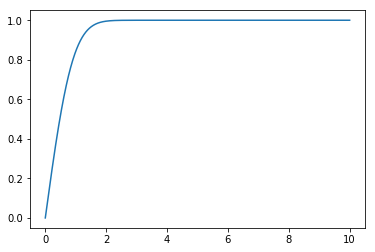

In [90]:
from scipy.special import erf
xx = np.linspace(0,10,1000)
yy = erf(xx)
plt.plot(xx,yy)

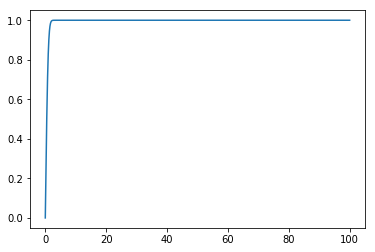

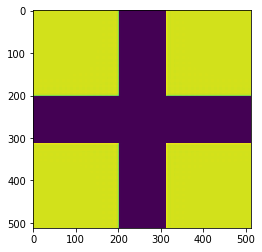

SyntaxError: invalid syntax (<ipython-input-5-e02562e9d9a5>, line 1)

## Derivatives
* Part 3
\begin{align}
\frac{\partial f_2(K,\theta)}{\partial \mu_j} &= \frac{c\sigma^2}{4}\sum_{n=0}^{N-1} \sum_{m=0}^{M-1} \sum_{l=0}^L k_{n,m} \psi_{\sigma}(m,\nu_l)  \frac{\partial \psi_{\sigma}(n,\mu_l)}{\partial \mu_j}\\
\frac{\partial \psi_{\sigma}(n,\mu_l)}{\partial \mu_j} &= \begin{cases} \frac{\partial \psi_{\sigma}(n,\mu_j)}{\partial \mu_j} & \text{ if } & l=j\\ 0 & \text{ else}
\end{cases}\\
\frac{\partial \psi_{\sigma}(n,\mu_j)}{\partial \mu_j} &= \frac{\partial erf\left(\frac{n + \mu_j}{2 \sqrt{2} \pi\sigma}\right)}{\partial \mu_j} - \frac{\partial erf\left(\frac{n + \mu_j + 1}{2 \sqrt{2} \pi\sigma}\right)}{\partial \mu_j} \\
&=\frac{2}{\sqrt {\pi}} \frac{e^{-\frac{(n + \mu_j)^2}{8 \pi^2\sigma^2}}}{2 \sqrt{2} \pi\sigma} - \frac{2}{\sqrt {\pi}} \frac{e^{-\frac{(n + \mu_j + 1)^2}{8 \pi^2\sigma^2}}}{2 \sqrt{2} \pi\sigma}\\
&=\frac{1}{\sqrt {2\pi^3} \sigma} \left(e^{-\frac{(n + \mu_j)^2}{8 \pi^2\sigma^2}} -  e^{-\frac{(n + \mu_j + 1)^2}{8 \pi^2\sigma^2}}\right)\\
\frac{\partial f_2(K,\theta)}{\partial \mu_j} &= \frac{c\sigma^2}{4}\sum_{n=0}^{N-1} \sum_{m=0}^{M-1} k_{n,m} \psi_{\sigma}(m,\nu_j) \frac{1}{\sqrt {2\pi^3} \sigma} \left(e^{-\frac{(n + \mu_j)^2}{8 \pi^2\sigma^2}} -  e^{-\frac{(n + \mu_j + 1)^2}{8 \pi^2\sigma^2}}\right)\\
&= \frac{c\sigma}{4 \sqrt {2\pi^3}} \sum_{m=0}^{M-1} \psi_{\sigma}(m,\nu_j) \sum_{n=0}^{N-1}  k_{n,m} \left(e^{-\frac{(n + \mu_j)^2}{8 \pi^2\sigma^2}} -  e^{-\frac{(n + \mu_j + 1)^2}{8 \pi^2\sigma^2}}\right)\\
&= \frac{c\sigma}{4 \sqrt {2\pi^3}} \sum_{m=0}^{M-1} \psi_{\sigma}(m,\nu_j) \sum_{n=0}^{N} (k_{n,m} - k_{n-1,m}) e^{-\frac{(n + \mu_j)^2}{8 \pi^2\sigma^2}} & \text{ where } k_{-1,m} = k_{N,m} = 0 \\
&= \frac{c\sigma}{4 \sqrt {2\pi^3}}  \sum_{n=0}^{N} e^{-\frac{(n + \mu_j)^2}{8 \pi^2\sigma^2}} \sum_{m=0}^{M-1} (k_{n,m} - k_{n-1,m}) \psi_{\sigma}(m,\nu_j) \\
&= \frac{c\sigma}{4 \sqrt {2\pi^3}}  \sum_{n=0}^{N} e^{-\frac{(n + \mu_j)^2}{8 \pi^2\sigma^2}} \sum_{m=0}^{M} (k_{n,m} - k_{n-1,m} - k_{n,m-1} + k_{n-1,m-1})erf\left(\frac{m + \nu_j}{2 \sqrt{2} \pi\sigma}\right) & \text{ where } k_{n,-1} = k_{n,M} = 0\\
&= \frac{c\sigma}{4 \sqrt {2\pi^3}}  \sum_{n=0}^{N} \sum_{m=0}^{M} \Delta_{n,m} e^{-\frac{(n + \mu_j)^2}{8 \pi^2\sigma^2}}   erf\left(\frac{m + \nu_j}{2 \sqrt{2} \pi\sigma}\right) \\
\end{align}
* Part 2
\begin{align}
\frac{\partial f_3(\theta)}{\partial \mu_j} &= \frac{\partial c^2\sigma^2 \sum_{l=0}^L \sum_{l'=0}^L  e^{\frac{-(\mu_l + \mu_{l'})^2}{4\sigma^2}}e^{\frac{-(\nu_l + \nu_{l'})^2}{4\sigma^2}}}{\partial \mu_j}\\
&= c^2\sigma^2 \sum_{l=0}^L \sum_{l'=0}^L e^{\frac{-(\nu_l + \nu_{l'})^2}{4\sigma^2}}   \frac{\partial e^{\frac{-(\mu_l + \mu_{l'})^2}{4\sigma^2}}}{\partial \mu_j}\\
\frac{\partial e^{\frac{-(\mu_l + \mu_{l'})^2}{4\sigma^2}}}{\partial \mu_j} & = 
\begin{cases}
e^{\frac{-(\mu_l + \mu_{l'})^2}{4\sigma^2}} \frac{-2(\mu_l + \mu_{l'})}{4\sigma^2}  & \text{ if } l=j \text{ and/or } l'=j\\
0 & \text{ else }
\end{cases}\\
\frac{\partial f_3(\theta)}{\partial \mu_j} &= -\frac{c^2}{2} \sum_{l=0}^L e^{\frac{-(\nu_l + \nu_{j})^2}{4\sigma^2}} e^{\frac{-(\mu_l + \mu_j)^2}{4\sigma^2}}(\mu_l + \mu_j)\\
&= -\frac{c^2}{2} \sum_{l=0}^L e^{\frac{-\nu_l^2 - 2\nu_l\nu_{j} - \nu_{j}^2}{4\sigma^2}} e^{\frac{-\mu_l^2 - 2\mu_l\mu_j - \mu_j^2}{4\sigma^2}}(\mu_l + \mu_j) & \text{ let } U_{ij} = \mu_i + \mu_j,V_{ij} = \nu_i + \nu_j \\
\end{align}
* Everything toghether
\begin{align}
\frac{\partial f(K,\theta)}{\partial \mu_j} &= -\frac{c^2}{2} \sum_{l=0}^L e^{\frac{-(\nu_l + \nu_{j})^2}{4\sigma^2}} e^{\frac{-(\mu_l + \mu_j)^2}{4\sigma^2}}(\mu_l + \mu_j) - \frac{c\sigma}{2\sqrt {2\pi^3}}\sum_{n=0}^{N-1} \sum_{m=0}^{M-1} k_{n,m} \psi_{\sigma}(m,\nu_j) \left(e^{-\frac{(n + \mu_j)^2}{8 \pi^2\sigma^2}} -  e^{-\frac{(n + \mu_j + 1)^2}{8 \pi^2\sigma^2}}\right)\\
\end{align}

In [22]:
help(np.sinc)

Help on function sinc in module numpy.lib.function_base:

sinc(x)
    Return the sinc function.
    
    The sinc function is :math:`\sin(\pi x)/(\pi x)`.
    
    Parameters
    ----------
    x : ndarray
        Array (possibly multi-dimensional) of values for which to to
        calculate ``sinc(x)``.
    
    Returns
    -------
    out : ndarray
        ``sinc(x)``, which has the same shape as the input.
    
    Notes
    -----
    ``sinc(0)`` is the limit value 1.
    
    The name sinc is short for "sine cardinal" or "sinus cardinalis".
    
    The sinc function is used in various signal processing applications,
    including in anti-aliasing, in the construction of a Lanczos resampling
    filter, and in interpolation.
    
    For bandlimited interpolation of discrete-time signals, the ideal
    interpolation kernel is proportional to the sinc function.
    
    References
    ----------
    .. [1] Weisstein, Eric W. "Sinc Function." From MathWorld--A Wolfram Web
           

In [23]:
x = np.linspace(-4, 4, 401)

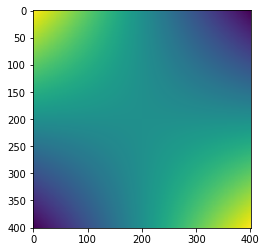

In [27]:
xx = np.outer(x, x)
plt.imshow(xx)

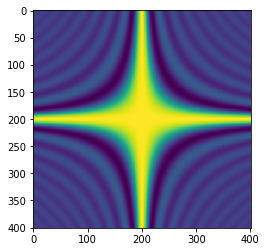

In [25]:
plt.imshow(np.sinc(xx))